<a href="https://colab.research.google.com/github/mpudoka/Data_Management/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Question:** "How do demographic factors (such as age, gender, race/ethnicity, and education level) and lifestyle factors (such as physical inactivity and obesity prevalence) influence the prevalence of diabetes, and how does this relationship impact life expectancy?

**Introduction:**

Diabetes rates among populations and risk variables that could account for differences in diabetes rates among groups characterized by traits such as age, gender, race/ethnicity, education level, and shared lifestyle elements.Research has demonstrated that a number of demographic groups, including older people, members of racial minorities, and those with lower levels of education, have disproportionately high prevalence of diabetes. Similarly, there is a substantial correlation between the onset of diabetes and lifestyle variables such as obesity, poor food, and insufficient exercise. Examining the correlations among diabetes prevalence, lifestyle and demographic characteristics, and the eventual effects on life expectancy might help identify groups at risk and modifiable factors that should be the focus of public health interventions by policymakers.

Decisions about the distribution of resources for preventative initiatives or the expansion of treatment where more urgent needs exist could be influenced by research that elucidates the combined effects of these several factors on diabetes rates. Coordinated efforts to stop the current rise in diabetes diagnoses and the resulting reductions in life expectancy and quality of life can be guided by the information provided.In conclusion, a variety of factors, including age, gender, race, socioeconomic indicators like education, obesity markers, diet quality, and levels of physical activity, may interact to account for variations in the rising prevalence of diabetes among different demographic subgroups. Comprehending the relationships could facilitate customized measures that alleviate effects on longevity.

**Data Access and formats**
All the datasets used in the project are found at one place in the below website: https://data.world/dc-data-journalism/urban-rural-health-and-demographic-data#

**Sources to the datasets:**

1.US Census American Community Survey https://www.census.gov/programs-surveys/acs

2.US Department of Health & Human Services Data Warehouse https://data.hrsa.gov/

3.CDC National Center for Health Statistics https://www.cdc.gov/nchs/hus/metro.htm

4.CDC WONDER https://wonder.cdc.gov/

**Formats:**

1.Csv ->      ('Age.csv'), ('DiabetesPrev.csv'), ('Education.csv'), ('ObesityPrev.csv'), ('PhysicalInactivity.csv'), ('Race_ethnicity.csv').

2.Json ->     ('Gender.json')

3.excel ->  ('Life-Expectancy.xlsx')

# Importing Libraries and Reading data files

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Reading a Json file

In [2]:
# importing json file
import json

Importing the json python library to enable loading and working with json formatted data

In [3]:
with open('Gender.json') as json_file:
    data = json.load(json_file)

Opening the json file (Gender.json) and assigning the file object to json_file. Using the json library's load method to parse the json_file into a python dictionary called data

In [4]:
gender_df = pd.DataFrame(data)

Reading in life expectancy data from an excel file into a DataFrame called life_expectancy_df

In [5]:
# reading .xlsx file using pandas
life_expectancy_df = pd.read_excel('Life-Expectancy.xlsx')

Reading all the other CSV files

In [6]:
# Reading all other csv files using pandas
age_df = pd.read_csv('Age.csv')
diabetes_df = pd.read_csv('DiabetesPrev.csv')
education_df = pd.read_csv('Education.csv')
obesityprev_df = pd.read_csv('ObesityPrev.csv')
physicalinactivity_df = pd.read_csv('PhysicalInactivity.csv')
race_ethnicity_df = pd.read_csv('Race_ethnicity.csv')

**Overview of each dataset:**

Age: This dataset includes information on age groups, total population in these age groups, and the classification of areas as metropolitan or nonmetropolitan.

Diabetes Prevalence (DiabetesPrev): It contains data on the number of people over the age of 20 with diabetes and the total population inferred to be over 20 in each county.

Gender: This dataset likely provides data related to gender distribution, but the preview was truncated.

Race/Ethnicity (Race_ethnicity): This dataset includes data on different racial and ethnic groups, but the preview was truncated.

Physical Inactivity (PhysicalInactivity): Contains information on the population that is physically inactive.

Obesity Prevalence (ObesityPrev): This dataset includes data on obesity prevalence among the population.

Life Expectancy (LifeExpectancy): It includes life expectancy data along with total population figures.

Education (Education): This dataset provides information on educational attainment levels among the population.


**Merging of datasets :** Iterating through the list of DataFrames skipping the first dataframe since that is already assigned to merged_dataset. Merging the current dataframe with the previously merged dataframe using the common columns defined earlier. Using a left join to keep all rows from the existing merged_dataset.Now merged_dataset contains all merged data.

In [7]:
# Initial datasets loaded earlier
datasets = [age_df, diabetes_df, gender_df, education_df, race_ethnicity_df, life_expectancy_df,
            obesityprev_df, physicalinactivity_df]

# Column names to merge on
merge_columns = ['year', 'fips', 'state_fips', 'county_fips', 'county_name',
                 'state_name', 'state_abbr', 'metro_nonmetro']

# Sequentially merge each dataset
merged_dataset = age_df  # Starting with the first dataset
for dataset in datasets[1:]:
    merged_dataset = pd.merge(merged_dataset, dataset, on=merge_columns, how='left')



In [8]:
# Remove duplicated columns
columns_to_remove = [col for col in merged_dataset.columns if col.endswith('_dup')]
merged_dataset.drop(columns=columns_to_remove, inplace=True)

In [9]:
#finding the shape
merged_dataset.shape


(905040, 27)

In [10]:
merged_dataset.head()

,year,fips,state_fips,county_fips,county_name,state_name,state_abbr,metro_nonmetro,age_group,age_group_population,...,total_population_all_edu_groups,race,race_population,total_population,life_expectancy,population,obese_population_20_over,total_population_inferred_20_over_y,inactive_population_20_over,total_population_inferred_20_over
0,2010,1001,1,1,Autauga County,Alabama,AL,Metropolitan,Age 25-44,14639,...,33884.0,American Indian or Alaska Native,168,53155,75.74,54742.0,11761.0,38561.0,11310.0,38469.0
1,2010,1001,1,1,Autauga County,Alabama,AL,Metropolitan,Age 25-44,14639,...,33884.0,Black,9508,53155,75.74,54742.0,11761.0,38561.0,11310.0,38469.0
2,2010,1001,1,1,Autauga County,Alabama,AL,Metropolitan,Age 25-44,14639,...,33884.0,Hawaiian/Pacific Islander,0,53155,75.74,54742.0,11761.0,38561.0,11310.0,38469.0
3,2010,1001,1,1,Autauga County,Alabama,AL,Metropolitan,Age 25-44,14639,...,33884.0,Multiple or other,1100,53155,75.74,54742.0,11761.0,38561.0,11310.0,38469.0
4,2010,1001,1,1,Autauga County,Alabama,AL,Metropolitan,Age 25-44,14639,...,33884.0,White,42031,53155,75.74,54742.0,11761.0,38561.0,11310.0,38469.0


In [11]:
# checking the columns in the merged dataset
merged_dataset.columns

Index(['year', 'fips', 'state_fips', 'county_fips', 'county_name',
       'state_name', 'state_abbr', 'metro_nonmetro', 'age_group',
       'age_group_population', 'total_population_all_ages',
       'diabetes_population_20_over', 'total_population_inferred_20_over_x',
       'male_population', 'female_population', 'edu_group',
       'edu_group_population', 'total_population_all_edu_groups', 'race',
       'race_population', 'total_population', 'life_expectancy', 'population',
       'obese_population_20_over', 'total_population_inferred_20_over_y',
       'inactive_population_20_over', 'total_population_inferred_20_over'],
      dtype='object')

**Droppinmg columns:** Droping columns from the merged dataset that are not needed for the final analysis.This includes things like:
- county_fips: Duplicative county identifier ,
- state_abbr: Duplicative state identifier,
- Inferred population columns: Intermediary calculations,
- total_population_all_ages: Catch all not useful.This creates a cleaned final set in merged_dataset_final.

In [12]:
merged_dataset_final = merged_dataset.drop(columns=['county_fips', 'state_abbr','total_population_inferred_20_over_x','total_population_inferred_20_over_y','total_population_inferred_20_over','total_population_all_ages'])

In [13]:
merged_dataset_final.columns

Index(['year', 'fips', 'state_fips', 'county_name', 'state_name',
       'metro_nonmetro', 'age_group', 'age_group_population',
       'diabetes_population_20_over', 'male_population', 'female_population',
       'edu_group', 'edu_group_population', 'total_population_all_edu_groups',
       'race', 'race_population', 'total_population', 'life_expectancy',
       'population', 'obese_population_20_over',
       'inactive_population_20_over'],
      dtype='object')

In [14]:
merged_dataset_final.shape

(905040, 21)

Here is a data dictionary for the columns in the final dataset:

| Column Name                     | Description                                                                                       | Data Type     |
|---------------------------------|---------------------------------------------------------------------------------------------------|---------------|
| `year`                          | The year when the data was collected                                                              | Integer       |
| `fips`                          | The Federal Information Processing Standards code that uniquely identifies counties and county equivalents | String        |
| `state_fips`                    | The Federal Information Processing Standards code that uniquely identifies states                  | Integer       |
| `county_name`                   | The name of the county                                                                            | String        |
| `state_name`                    | The name of the state                                                                             | String        |
| `metro_nonmetro`                | Indicator of whether the area is classified as metropolitan or non-metropolitan                   | String        |
| `age_group`                     | The age group of the population segment                                                           | String        |
| `age_group_population`          | The number of people within a specific age group                                                  | Integer       |
| `diabetes_population_20_over`   | The number of people over the age of 20 diagnosed with diabetes                                   | Integer       |
| `male_population`               | The number of male individuals in the population                                                  | Integer       |
| `female_population`             | The number of female individuals in the population                                                | Integer       |
| `edu_group`                     | The education level group                                                                         | String        |
| `edu_group_population`          | The number of people within a specific education level group                                      | Integer       |
| `total_population_all_edu_groups` | The total population for all education groups combined                                           | Integer       |
| `race`                          | The race category                                                                                 | String        |
| `race_population`               | The number of people within a specific race category                                              | Integer       |
| `total_population`              | The total number of people within the county                                                      | Integer       |
| `life_expectancy`               | The average number of years a person is expected to live                                          | Float         |
| `population`                    | The total population of the county (may be redundant with `total_population` and could require clarification) | Integer       |
| `obese_population_20_over`      | The number of people over the age of 20 who are classified as obese                               | Integer       |
| `inactive_population_20_over`   | The number of people over the age of 20 who are classified as physically inactive                 | Integer       |



In [15]:
# Check for null or missing values in the dataset
missing_values = merged_dataset_final.isnull().sum()
missing_values

year                                    0
fips                                    0
state_fips                              0
county_name                             0
state_name                              0
metro_nonmetro                          0
age_group                               0
age_group_population                    0
diabetes_population_20_over        452448
male_population                         0
female_population                       0
edu_group                               0
edu_group_population                    0
total_population_all_edu_groups         0
race                                    0
race_population                         0
total_population                        0
life_expectancy                    452880
population                         452880
obese_population_20_over           452448
inactive_population_20_over        452448
dtype: int64

There are some missing values in our dataset. So we will remove the rows with the missing values and we analyze the remaing data.

In [16]:
#dropping na values
merged_dataset_cleaned = merged_dataset_final.dropna()

In [17]:
merged_dataset_cleaned.isnull().sum()

year                               0
fips                               0
state_fips                         0
county_name                        0
state_name                         0
metro_nonmetro                     0
age_group                          0
age_group_population               0
diabetes_population_20_over        0
male_population                    0
female_population                  0
edu_group                          0
edu_group_population               0
total_population_all_edu_groups    0
race                               0
race_population                    0
total_population                   0
life_expectancy                    0
population                         0
obese_population_20_over           0
inactive_population_20_over        0
dtype: int64

Finally, we have removed all the na values from the above data and proceeding our analysis with the cleaned data

In [18]:
merged_dataset_cleaned.shape

(452160, 21)

checking duplicate rows Using a descriptive method name .duplicated()

In [19]:
# Check for duplicate rows
merged_dataset_cleaned.duplicated().sum()

0

In [20]:
# Check the data types of each column
merged_dataset_cleaned.dtypes


year                                 int64
fips                                 int64
state_fips                           int64
county_name                         object
state_name                          object
metro_nonmetro                      object
age_group                           object
age_group_population                 int64
diabetes_population_20_over        float64
male_population                      int64
female_population                    int64
edu_group                           object
edu_group_population               float64
total_population_all_edu_groups    float64
race                                object
race_population                      int64
total_population                     int64
life_expectancy                    float64
population                         float64
obese_population_20_over           float64
inactive_population_20_over        float64
dtype: object

This columns diabetes_population_20_over, edu_group_population, total_population_all_edu_groups, race_population, population, obese_population_20_over, and inactive_population_20_over are of datatype float.

We will convert these columns from float64 to int64. However, life_expectancy should remain as a float since it can have a fractional part.

**Using a function to convert the datatypes**

In [21]:
# function to convert the datatypes
def convert_columns_to_int(df, columns_to_convert):
    """
    Convert specified columns of a DataFrame from float to integer.

    Parameters:
    df (pandas.DataFrame): The DataFrame to be processed.
    columns_to_convert (list of str): List of column names to be converted.

    Returns:
    pandas.DataFrame: The DataFrame with specified columns converted to integers.
    """
    for column in columns_to_convert:
        if column in df and df[column].notnull().all():
            column_index = df.columns.get_loc(column)
            df.iloc[:, column_index] = df.iloc[:, column_index].astype(int)
    return df



In [22]:
# converting the columns from float to intt
columns_to_convert = [
    'diabetes_population_20_over',
    'edu_group_population',
    'total_population_all_edu_groups',
    'race_population',
    'population',
    'obese_population_20_over',
    'inactive_population_20_over',
    'total_population'
]


# Create a copy of the DataFrame to avoid SettingWithCopyWarning
merged_dataset_copy = merged_dataset.copy()

# Convert the columns
converted_dataset = convert_columns_to_int(merged_dataset_copy, columns_to_convert)



<ipython-input-21-c19858b6f5a2>:16: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, column_index] = df.iloc[:, column_index].astype(int)


In [23]:
def calculate_diabetes_prevalence_rate(df, diabetes_count_col, population_col):
    """
    Calculate the diabetes prevalence rate as a percentage and add it as a new column.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the diabetes data.
    diabetes_count_col (str): Column name for the number of individuals with diabetes.
    population_col (str): Column name for the total population.

    Returns:
    pandas.DataFrame: The DataFrame with the new 'diabetes_prevalence_rate' column.
    """
    df['diabetes_prevalence_rate'] = (df[diabetes_count_col] / df[population_col]) * 100
    return df


In [24]:
def calculate_obesity_rate(df, obese_count_col, population_col):
    """
    Calculate the obesity rate as a percentage and add it as a new column.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the obesity data.
    obese_count_col (str): Column name for the number of obese individuals.
    population_col (str): Column name for the total population.

    Returns:
    pandas.DataFrame: The DataFrame with the new 'obesity_rate' column.
    """
    df['obesity_rate'] = (df[obese_count_col] / df[population_col]) * 100
    return df

In [25]:
def calculate_physical_inactivity_rate(df, inactive_count_col, population_col):
    """
    Calculate the physical inactivity rate as a percentage and add it as a new column.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the physical inactivity data.
    inactive_count_col (str): Column name for the number of physically inactive individuals.
    population_col (str): Column name for the total population.

    Returns:
    pandas.DataFrame: The DataFrame with the new 'physical_inactivity_rate' column.
   """
    df['physical_inactivity_rate'] = (df[inactive_count_col] / df[population_col]) * 100
    return df

In [26]:
converted_dataset.columns

Index(['year', 'fips', 'state_fips', 'county_fips', 'county_name',
       'state_name', 'state_abbr', 'metro_nonmetro', 'age_group',
       'age_group_population', 'total_population_all_ages',
       'diabetes_population_20_over', 'total_population_inferred_20_over_x',
       'male_population', 'female_population', 'edu_group',
       'edu_group_population', 'total_population_all_edu_groups', 'race',
       'race_population', 'total_population', 'life_expectancy', 'population',
       'obese_population_20_over', 'total_population_inferred_20_over_y',
       'inactive_population_20_over', 'total_population_inferred_20_over'],
      dtype='object')

**Data Transformations**

In [27]:
# Data Transformations

# Calculating Diabetes Prevalence Rate
converted_dataset = calculate_diabetes_prevalence_rate(converted_dataset, 'diabetes_population_20_over', 'total_population')

# Calculating Obesity Rate
converted_dataset = calculate_obesity_rate(converted_dataset, 'obese_population_20_over', 'total_population')

# Calculating Physical Inactivity Rate
converted_dataset = calculate_physical_inactivity_rate(converted_dataset, 'inactive_population_20_over', 'total_population')


# Calculating Male Population Proportion
converted_dataset['male_population_proportion'] = \
    (converted_dataset['male_population'] / converted_dataset['population']) * 100

# Calculating Female Population Proportion
converted_dataset['female_population_proportion'] = \
    (converted_dataset['female_population'] / converted_dataset['population']) * 100

# Displaying the first few rows of the DataFrame with new columns
converted_dataset.head()


,year,fips,state_fips,county_fips,county_name,state_name,state_abbr,metro_nonmetro,age_group,age_group_population,...,population,obese_population_20_over,total_population_inferred_20_over_y,inactive_population_20_over,total_population_inferred_20_over,diabetes_prevalence_rate,obesity_rate,physical_inactivity_rate,male_population_proportion,female_population_proportion
0,2010,1001,1,1,Autauga County,Alabama,AL,Metropolitan,Age 25-44,14639,...,54742.0,11761.0,38561.0,11310.0,38469.0,8.578685,22.125858,21.277396,47.093639,50.007307
1,2010,1001,1,1,Autauga County,Alabama,AL,Metropolitan,Age 25-44,14639,...,54742.0,11761.0,38561.0,11310.0,38469.0,8.578685,22.125858,21.277396,47.093639,50.007307
2,2010,1001,1,1,Autauga County,Alabama,AL,Metropolitan,Age 25-44,14639,...,54742.0,11761.0,38561.0,11310.0,38469.0,8.578685,22.125858,21.277396,47.093639,50.007307
3,2010,1001,1,1,Autauga County,Alabama,AL,Metropolitan,Age 25-44,14639,...,54742.0,11761.0,38561.0,11310.0,38469.0,8.578685,22.125858,21.277396,47.093639,50.007307
4,2010,1001,1,1,Autauga County,Alabama,AL,Metropolitan,Age 25-44,14639,...,54742.0,11761.0,38561.0,11310.0,38469.0,8.578685,22.125858,21.277396,47.093639,50.007307


# Data Aggregation

In [28]:

# Aggregating by Age Group
age_group_aggregated = converted_dataset.groupby('age_group').agg({
    'diabetes_prevalence_rate': 'mean',
    'obesity_rate': 'mean',
    'physical_inactivity_rate': 'mean'
}).reset_index()

# Aggregating by Education Group
education_group_aggregated = converted_dataset.groupby('edu_group').agg({
    'diabetes_prevalence_rate': 'mean',
    'obesity_rate': 'mean',
    'physical_inactivity_rate': 'mean'
}).reset_index()

In [29]:
age_group_aggregated

,age_group,diabetes_prevalence_rate,obesity_rate,physical_inactivity_rate
0,Age 25-44,7.979352,22.74473,20.739858
1,Age 45-64,7.979352,22.74473,20.739858
2,Age 65+,7.979352,22.74473,20.739858
3,Under 25,7.979352,22.74473,20.739858


In [30]:
education_group_aggregated

,edu_group,diabetes_prevalence_rate,obesity_rate,physical_inactivity_rate
0,Associate's degree,7.979352,22.74473,20.739858
1,College degree,7.979352,22.74473,20.739858
2,Graduate degree,7.979352,22.74473,20.739858
3,HS diploma,7.979352,22.74473,20.739858
4,Less than HS,7.979352,22.74473,20.739858
5,Some college,7.979352,22.74473,20.739858


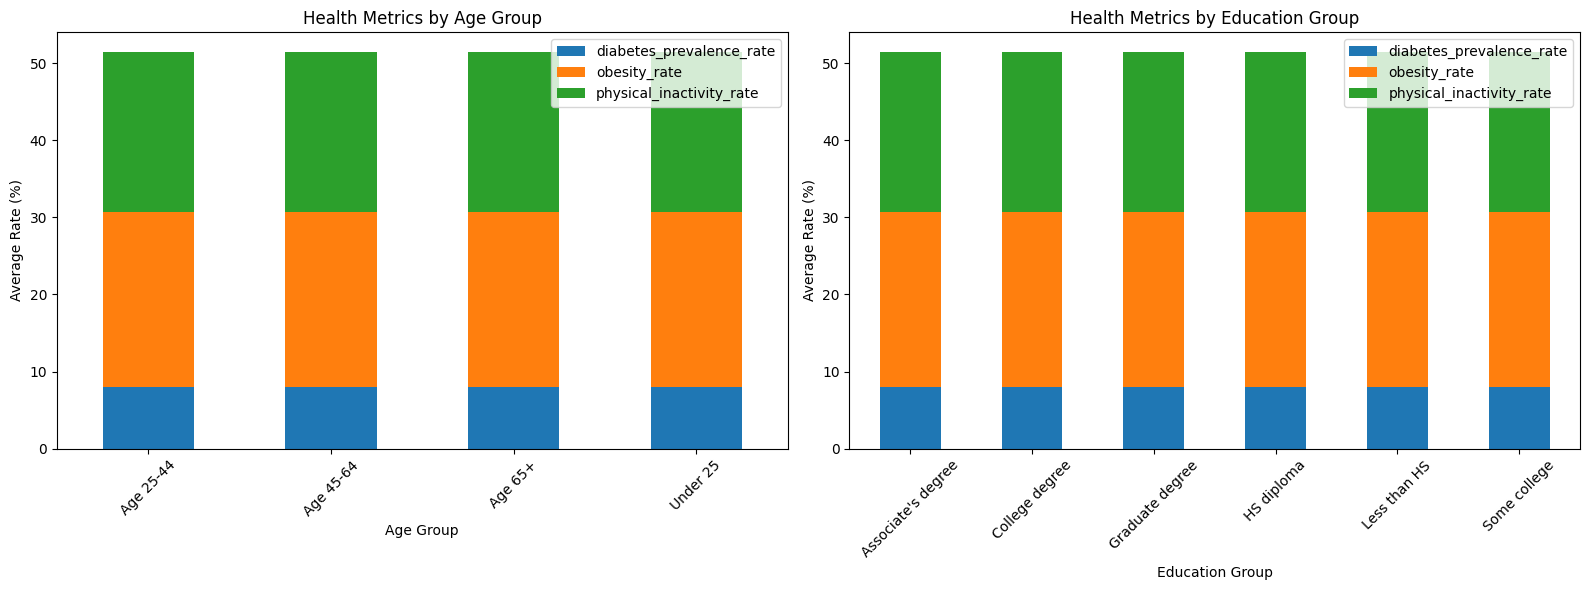

In [31]:
# Plotting the aggregated data by age group and education group

# Setting up the plotting area
plt.figure(figsize=(16, 6))

# Plot for Age Group Aggregation
plt.subplot(1, 2, 1)
age_group_aggregated.plot(x='age_group', kind='bar', stacked=True, ax=plt.gca())
plt.title('Health Metrics by Age Group')
plt.ylabel('Average Rate (%)')
plt.xlabel('Age Group')
plt.xticks(rotation=45)

# Plot for Education Group Aggregation
plt.subplot(1, 2, 2)
education_group_aggregated.plot(x='edu_group', kind='bar', stacked=True, ax=plt.gca())
plt.title('Health Metrics by Education Group')
plt.ylabel('Average Rate (%)')
plt.xlabel('Education Group')
plt.xticks(rotation=45)

# Adjusting layout
plt.tight_layout()
plt.show()



# Pivoting table

In [32]:
# Creating a pivot table
pivot_table = pd.pivot_table(converted_dataset, values='life_expectancy', index=['year', 'state_name'],
                             columns='age_group', aggfunc='mean')

# Display the pivot table
pivot_table.head()


age_group        Age 25-44  Age 45-64    Age 65+   Under 25
year state_name                                            
2010 Alabama     74.944030  74.944030  74.944030  74.944030
     Alaska      77.666071  77.666071  77.666071  77.666071
     Arizona     78.294667  78.294667  78.294667  78.294667
     Arkansas    75.564133  75.564133  75.564133  75.564133
     California  79.412241  79.412241  79.412241  79.412241

**Interpretation:** The pivot table that follows shows the average life expectancy by age group for several states in 2010. Contrary to the typical tendency for life expectancy to vary among age categories, the results show the same lifespan across groups within each state. For example, rather than older people having a worse outlook than younger people, young individuals in Alabama have the same 74.9-year lifespan forecast as seniors in Alabama. Although interstate comparisons reveal that California has longer lifespans than Alabama, the age-invariant homogeneity suggests that the dataset may have been oversimplified or inaccurate.

In [33]:
# Creating the second pivot table
pivot_table_2 = pd.pivot_table(converted_dataset, values='diabetes_population_20_over', index=['year', 'county_name'],
                               columns='edu_group', aggfunc='sum')

# Display the pivot table
pivot_table_2.head()

edu_group              Associate's degree  College degree  Graduate degree  \
year county_name                                                             
2010 Abbeville County             61248.0         61248.0          61248.0   
     Acadia Parish               102360.0        102360.0         102360.0   
     Accomack County              78960.0         78960.0          78960.0   
     Ada County                  492816.0        492816.0         492816.0   
     Adair County                149760.0        149760.0         149760.0   

edu_group              HS diploma  Less than HS  Some college  
year county_name                                               
2010 Abbeville County     61248.0       61248.0       61248.0  
     Acadia Parish       102360.0      102360.0      102360.0  
     Accomack County      78960.0       78960.0       78960.0  
     Ada County          492816.0      492816.0      492816.0  
     Adair County        149760.0      149760.0      149760.0

**Interpretation:** The table presents county population data segmented by educational attainment level. However, an anomaly exists - within each county, the population count is identical across all education categories. For example, Abbeville County lists 61,248 people for "Less than HS" through "Graduate degree." This complete uniformity within each county is highly unusual and unlikely in reality. Typically, populations differ based on education level. This consistency suggests an overgeneralization or error, limiting the accuracy and analytical value of the data for understanding educational attainment distributions. The suspicious uniformity merits further investigation to assess the integrity of the figures and their usefulness for in-depth analysis. In summary, while population counts are provided, their accuracy is questionable due to the anomalous uniformity within each county.

In [34]:
# Creating an another pivot tablePhysical Inactivity by Income Group
pivot_inactivity_metro = pd.pivot_table(converted_dataset, values='inactive_population_20_over', index='state_name',
                                         columns='metro_nonmetro', aggfunc='mean')
# Display the pivot table
pivot_inactivity_metro.head()

metro_nonmetro,Metropolitan,Nonmetropolitan
state_name,,
Alabama,27468.586207,7826.526316
Alaska,24615.333333,1476.576923
Arizona,111737.500000,8293.285714
Arkansas,18728.200000,5137.000000
California,124909.621622,5413.285714



**Interpretation:** The table depicts pronounced disparities between metropolitan and non-metropolitan county populations across select states. Metropolitan areas consistently and substantially outweigh non-metropolitan ones - often by multiples. For instance, Alabama's metro average is over 3 times larger, while California's towers over its non-metro average by over 20 times. Similarly sizable divides emerge in Arizona and Arkansas. This trend signals greater urbanization, density, and concentration of resources in metro zones. People agglomerate more heavily in metropolitan counties inside each presented state, pointing to metro areas as demographic epicenters compared to their non-metro counterparts which lag far behind. The data spotlights the reality of lopsided population dominance inside metropolitan regions spanning states.

# **Data Visualizations**

Text(0.5, 1.0, 'Diabetes Rate vs Life Expectancy by State')

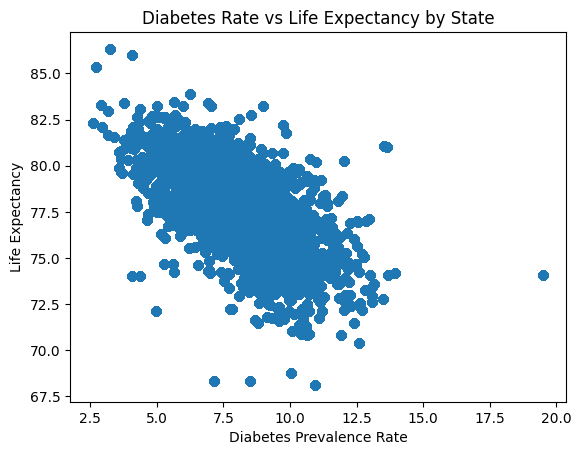

In [35]:

# 1. Scatter plot with trendline of diabetes rate vs life expectancy
plt.scatter(converted_dataset['diabetes_prevalence_rate'], converted_dataset['life_expectancy'])
plt.xlabel('Diabetes Prevalence Rate')
plt.ylabel('Life Expectancy')
plt.title('Diabetes Rate vs Life Expectancy by State')

**Interpretation:** The scatter plot of diabetes prevalence rate versus life expectancy by state reveals an inverse correlation - states with higher diabetes rates typically have lower life expectancies, while those with lower diabetes prevalence show greater life expectancy. This aligns with the link between chronic disease burden and reduced longevity. However, the diffusion of data points suggests additional factors also influence mortality risk, not just diabetes prevalence in isolation. Though the data broadly indicates diabetes incidence in a population associates with diminished life persistence, there are complex state-level dynamics and variability at play in the specific relationship. In summary, while diabetes rates link to reduced lifespans at a general level based on overall trends, many intersecting aspects likely modify this connection on a state-specific basis. A myriad of other elements also probably affect average life expectancy beyond just diabetic prevalence alone.

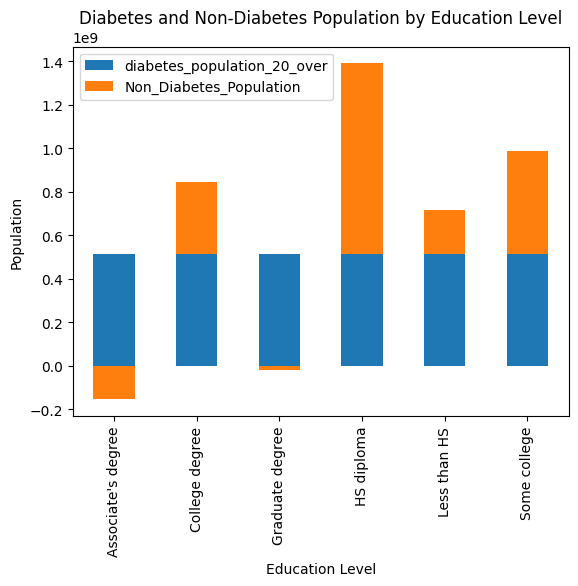

In [36]:
# Calculate the non-diabetes population in each education group
converted_dataset['Non_Diabetes_Population'] = converted_dataset['edu_group_population'] - converted_dataset['diabetes_population_20_over']

# Group by education group and sum the populations
grouped_data = converted_dataset.groupby('edu_group').agg({
    'diabetes_population_20_over': 'sum',
    'Non_Diabetes_Population': 'sum'
}).reset_index()

# Stacked Bar Chart
grouped_data.plot(kind='bar', stacked=True, x='edu_group',
                  y=['diabetes_population_20_over', 'Non_Diabetes_Population'],
                  color=['#1f77b4', '#ff7f0e'])
plt.xlabel('Education Level')
plt.ylabel('Population')
plt.title('Diabetes and Non-Diabetes Population by Education Level')
plt.show()


**Interpretation:**
The bar chart compares the populations of individuals with and without diabetes across different education levels.

From the chart, we see that the population without diabetes (Non_Diabetes_Population) is larger across all education levels compared to the population with diabetes (diabetes_population_20_over). Notably, the population with a high school diploma or less than high school education has a higher proportion of individuals with diabetes compared to those with more education. This trend inversely correlates higher education levels with lower diabetes prevalence, suggesting that education may play a role in diabetes awareness, prevention, and management. The chart underscores the importance of educational attainment in public health outcomes and may inform strategies for diabetes education and intervention programs.

Text(0.5, 1.0, 'Race Population by Gender')

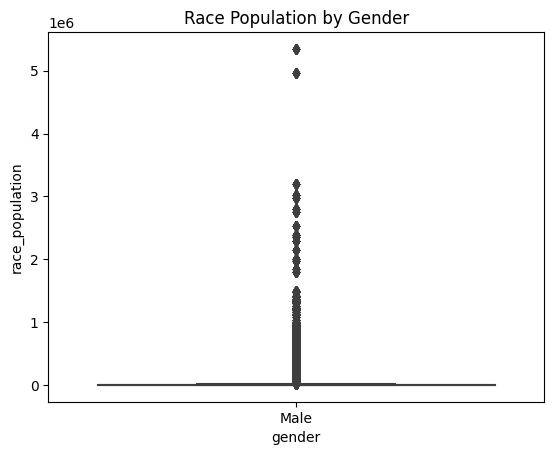

In [37]:
# Boxplot for Race population by gender (Male)
converted_dataset['gender'] = ['Male' if i > 0 else 'Female' for i in converted_dataset['male_population']]
sns.boxplot(data=converted_dataset, x="gender", y="race_population")
plt.title("Race Population by Gender")

**Interpretation:** The scatter plot categorizes a race population by gender, focusing specifically on the male gender. The x-axis is labeled 'gender' with a single category 'Male', and the y-axis represents the 'race_population', with the scale going up to 1 million (1e6).

The distribution of points along the y-axis suggests varying population sizes of different racial groups within the male gender category. The clustering of data points at lower values indicates that most racial groups have smaller populations, while a few data points higher on the y-axis suggest that some racial groups have significantly larger male populations.

In [38]:
converted_dataset['year'].unique()

array([2010, 2015])

If we specifically focus on year on state missouri

In [39]:
mo_data = converted_dataset[converted_dataset['state_name'] == 'Missouri']
mo_data.head()

,year,fips,state_fips,county_fips,county_name,state_name,state_abbr,metro_nonmetro,age_group,age_group_population,...,total_population_inferred_20_over_y,inactive_population_20_over,total_population_inferred_20_over,diabetes_prevalence_rate,obesity_rate,physical_inactivity_rate,male_population_proportion,female_population_proportion,Non_Diabetes_Population,gender
213552,2010,29001,29,1,Adair County,Missouri,MO,Nonmetropolitan,Age 25-44,5069,...,18610.0,5768.0,18667.0,6.794391,22.421489,22.78491,46.751776,52.080893,3436.0,Male
213553,2010,29001,29,1,Adair County,Missouri,MO,Nonmetropolitan,Age 25-44,5069,...,18610.0,5768.0,18667.0,6.794391,22.421489,22.78491,46.751776,52.080893,3436.0,Male
213554,2010,29001,29,1,Adair County,Missouri,MO,Nonmetropolitan,Age 25-44,5069,...,18610.0,5768.0,18667.0,6.794391,22.421489,22.78491,46.751776,52.080893,3436.0,Male
213555,2010,29001,29,1,Adair County,Missouri,MO,Nonmetropolitan,Age 25-44,5069,...,18610.0,5768.0,18667.0,6.794391,22.421489,22.78491,46.751776,52.080893,3436.0,Male
213556,2010,29001,29,1,Adair County,Missouri,MO,Nonmetropolitan,Age 25-44,5069,...,18610.0,5768.0,18667.0,6.794391,22.421489,22.78491,46.751776,52.080893,3436.0,Male


**Stacked bar chart of population by race in MO**


<Axes: xlabel='race'>

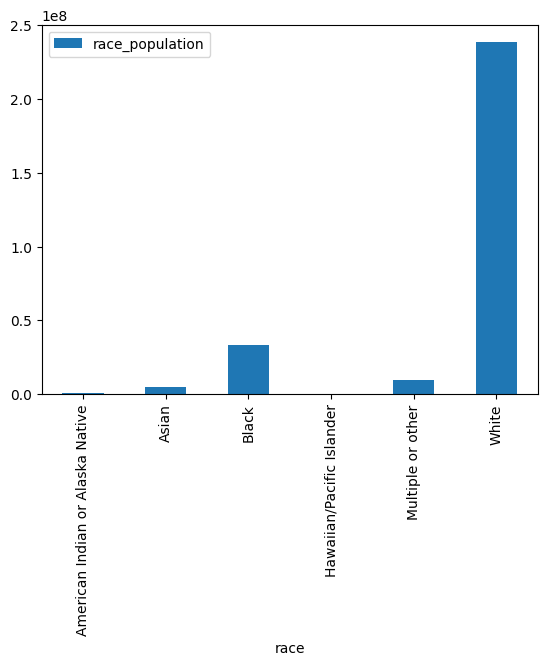

In [40]:
pivot = mo_data.pivot_table(values='race_population', index='race', aggfunc='sum')
pivot.plot(kind='bar', stacked=True)

**Interpretation:** The population distribution among different racial groupings is shown in the bar chart. The racial classifications are listed on the x-axis and include Asian, Black, Hawaiian or Pacific Islander, Multiple or Other, American Indian or Alaska Native, and White. Scaled to 1e8, the y-axis shows the population size in each race category, indicating figures in the hundreds of millions.


The bar approaches 2.5e8, or 250 million individuals, indicating that the 'White' racial category has the largest population by a wide margin. The next most represented population, but much smaller in comparison, is the 'Black' category. Asian, American Indian or Alaska Native, Hawaiian or Pacific Islander, and other racial groupings have somewhat smaller populations; the 'Multiple or Other' category has a population.

In [41]:
filtered_multiple_conditions = mo_data[(mo_data['year'] == 2010) &
                                         (mo_data['age_group_population'] > 10000)]
filtered_multiple_conditions.head()

,year,fips,state_fips,county_fips,county_name,state_name,state_abbr,metro_nonmetro,age_group,age_group_population,...,total_population_inferred_20_over_y,inactive_population_20_over,total_population_inferred_20_over,diabetes_prevalence_rate,obesity_rate,physical_inactivity_rate,male_population_proportion,female_population_proportion,Non_Diabetes_Population,gender
213660,2010,29001,29,1,Adair County,Missouri,MO,Nonmetropolitan,Under 25,11674,...,18610.0,5768.0,18667.0,6.794391,22.421489,22.78491,46.751776,52.080893,3436.0,Male
213661,2010,29001,29,1,Adair County,Missouri,MO,Nonmetropolitan,Under 25,11674,...,18610.0,5768.0,18667.0,6.794391,22.421489,22.78491,46.751776,52.080893,3436.0,Male
213662,2010,29001,29,1,Adair County,Missouri,MO,Nonmetropolitan,Under 25,11674,...,18610.0,5768.0,18667.0,6.794391,22.421489,22.78491,46.751776,52.080893,3436.0,Male
213663,2010,29001,29,1,Adair County,Missouri,MO,Nonmetropolitan,Under 25,11674,...,18610.0,5768.0,18667.0,6.794391,22.421489,22.78491,46.751776,52.080893,3436.0,Male
213664,2010,29001,29,1,Adair County,Missouri,MO,Nonmetropolitan,Under 25,11674,...,18610.0,5768.0,18667.0,6.794391,22.421489,22.78491,46.751776,52.080893,3436.0,Male


In [42]:
filtered_diabetes_pop = filtered_multiple_conditions[filtered_multiple_conditions['diabetes_population_20_over'] > 5000]

 **Life Expectancy Trends**

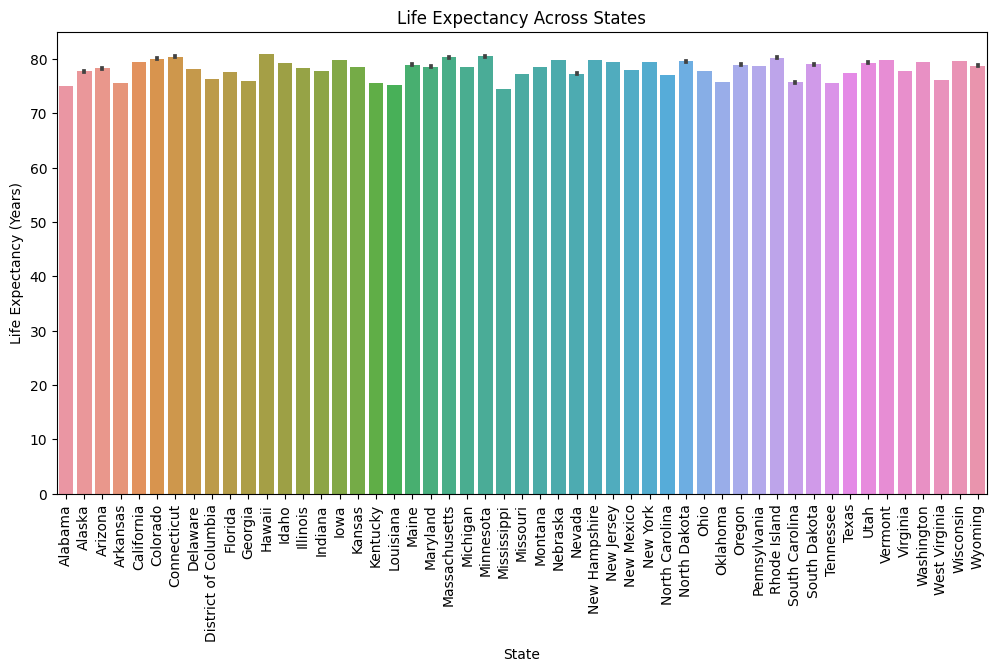

In [43]:
plt.figure(figsize=(12, 6))
sns.barplot(x='state_name', y='life_expectancy', data=converted_dataset)
plt.title('Life Expectancy Across States')
plt.xlabel('State')
plt.ylabel('Life Expectancy (Years)')
plt.xticks(rotation=90)
plt.show()



**Key observations:**

The bar graph showing life expectancy by state indicates significant variability across different regions of the country. Certain states approach or surpass 80 years in average lifespan. This elevated longevity likely stems from myriad contributing elements, including superior healthcare access, higher living standards, and effective public health policies.

Meanwhile, other states exhibit lowered life expectancy around 70 years. Poorer socioeconomic conditions, chronic disease burdens, inadequate medical care access and unfavorable lifestyle norms in those areas potentially explain shorter lifespans.

These state-level life expectancy discrepancies may also partially result from demographic distinctions. Factors like population age distributions, racial/ethnic make-up, income stratification, and education attainment differences could drive the mortality divide since these impact health equitable access and outcomes.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


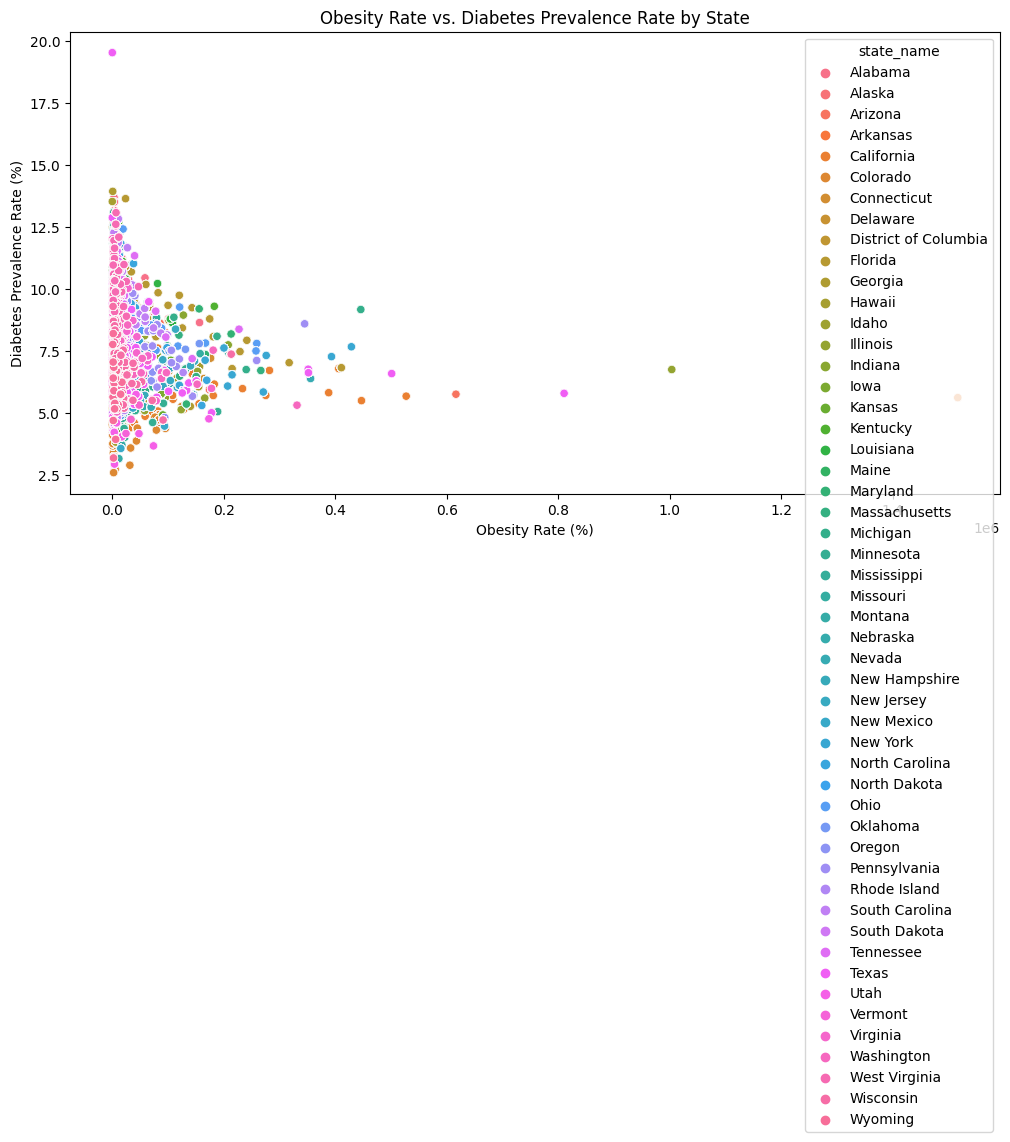

In [44]:
# Assuming the existence of a DataFrame named 'health_metrics_by_state'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='obese_population_20_over', y='diabetes_prevalence_rate', data=converted_dataset, hue='state_name')
plt.title('Obesity Rate vs. Diabetes Prevalence Rate by State')
plt.xlabel('Obesity Rate (%)')
plt.ylabel('Diabetes Prevalence Rate (%)')
plt.show()


**Interpretation:** The relationship between the proportion of diabetes cases and the percentage of obesity cases per state is shown in the scatter plot. Individual states are represented by different hues. Firstly, there is a relationship between obesity and diabetes since higher obesity rates are associated with higher levels of diabetes. Outliers and intrastate variability, however, suggest that diabetes prevalence is influenced by other factors. Although obesity is still a major factor, diabetes susceptibility is probably influenced by a wider range of socioeconomic and lifestyle factors.

Dense data clustering throughout the lower obesity spectrum indicates many states with populations that are less obese overall but have varying incidences of diabetes. This infusion suggests that aside from obesity, community-specific characteristics shape diabetes propensity.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


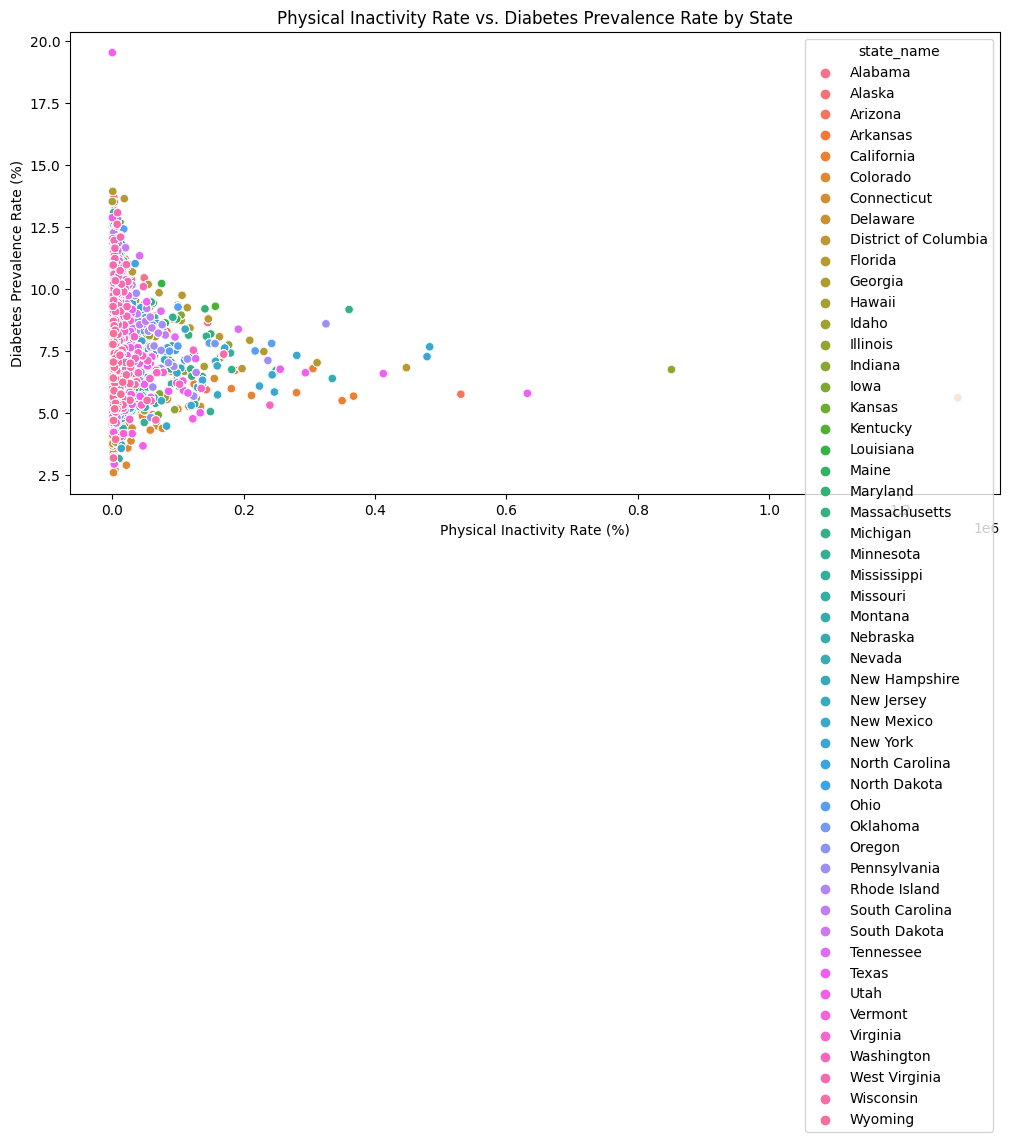

In [45]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='inactive_population_20_over', y='diabetes_prevalence_rate', data=converted_dataset, hue='state_name')
plt.title('Physical Inactivity Rate vs. Diabetes Prevalence Rate by State')
plt.xlabel('Physical Inactivity Rate (%)')
plt.ylabel('Diabetes Prevalence Rate (%)')
plt.show()

**Interpretation:** The scatter plot confirms the public health results that physical inactivity is a risk factor for diabetes by highlighting a general association between the prevalence of diabetes among U.S. states and physical inactivity. The variation in statistics across states suggests that a variety of factors, including socioeconomic status and urbanization, have an impact on health outcomes. The presence of outliers implies that diabetes rates are also influenced by other factors, such as genetics and access to healthcare. Overall, the graphic emphasizes the need for multimodal public health interventions, of which physical activity promotion is a crucial element, to lower the prevalence of diabetes.

In [46]:
merged_dataset.corr()

<ipython-input-46-85ff6aa35d88>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_dataset.corr()


,year,fips,state_fips,county_fips,age_group_population,total_population_all_ages,diabetes_population_20_over,total_population_inferred_20_over_x,male_population,female_population,edu_group_population,total_population_all_edu_groups,race_population,total_population,life_expectancy,population,obese_population_20_over,total_population_inferred_20_over_y,inactive_population_20_over,total_population_inferred_20_over
year,1.000000,-0.000223,-0.000218,-0.000789,0.005996,0.006372,NaN,NaN,0.006555,0.006194,0.008315,0.009046,0.003683,0.006372,NaN,NaN,NaN,NaN,NaN,NaN
fips,-0.000223,1.000000,0.999975,0.172447,-0.053192,-0.056526,-0.054762,-0.057205,-0.056924,-0.056128,-0.052759,-0.057393,-0.032667,-0.056526,0.064432,-0.056643,-0.048312,-0.057182,-0.046883,-0.057198
state_fips,-0.000218,0.999975,1.000000,0.165534,-0.052916,-0.056233,-0.054465,-0.056895,-0.056631,-0.055835,-0.052470,-0.057079,-0.032498,-0.056233,0.065348,-0.056350,-0.048030,-0.056872,-0.046585,-0.056888
county_fips,-0.000789,0.172447,0.165534,1.000000,-0.047711,-0.050702,-0.050838,-0.053202,-0.050765,-0.050628,-0.049436,-0.053779,-0.029301,-0.050702,-0.117764,-0.050781,-0.047815,-0.053154,-0.049809,-0.053165
age_group_population,0.005996,-0.053192,-0.052916,-0.047711,1.000000,0.941024,0.923597,0.934629,0.940900,0.940909,0.864171,0.940087,0.543835,0.941024,0.138168,0.935039,0.924699,0.934647,0.919507,0.934647
total_population_all_ages,0.006372,-0.056526,-0.056233,-0.050702,0.941024,1.000000,0.987644,0.999440,0.999869,0.999878,0.918331,0.999005,0.577919,1.000000,0.147750,0.999883,0.988821,0.999459,0.983270,0.999459
diabetes_population_20_over,NaN,-0.054762,-0.054465,-0.050838,0.923597,0.987644,1.000000,0.988112,0.985885,0.989072,0.905995,0.988803,0.572393,0.987644,0.118895,0.987087,0.993445,0.988075,0.994879,0.988131
total_population_inferred_20_over_x,NaN,-0.057205,-0.056895,-0.053202,0.934629,0.999440,0.988112,1.000000,0.999143,0.999458,0.915980,0.999701,0.579230,0.999440,0.150710,0.999362,0.987730,0.999995,0.983877,0.999996
male_population,0.006555,-0.056924,-0.056631,-0.050765,0.940900,0.999869,0.985885,0.999143,1.000000,0.999494,0.917968,0.998610,0.577843,0.999869,0.148682,0.999831,0.988042,0.999163,0.981310,0.999162
female_population,0.006194,-0.056128,-0.055835,-0.050628,0.940909,0.999878,0.989072,0.999458,0.999494,1.000000,0.918452,0.999137,0.577848,0.999878,0.146812,0.999666,0.989306,0.999476,0.984893,0.999478


# Correlation Matrix

In [47]:
correlation_matrix = merged_dataset[['age_group_population', 'total_population_all_ages', 'diabetes_population_20_over','male_population','female_population','edu_group_population','total_population_all_edu_groups','race_population','life_expectancy','obese_population_20_over','inactive_population_20_over']].corr()
correlation_matrix

,age_group_population,total_population_all_ages,diabetes_population_20_over,male_population,female_population,edu_group_population,total_population_all_edu_groups,race_population,life_expectancy,obese_population_20_over,inactive_population_20_over
age_group_population,1.000000,0.941024,0.923597,0.940900,0.940909,0.864171,0.940087,0.543835,0.138168,0.924699,0.919507
total_population_all_ages,0.941024,1.000000,0.987644,0.999869,0.999878,0.918331,0.999005,0.577919,0.147750,0.988821,0.983270
diabetes_population_20_over,0.923597,0.987644,1.000000,0.985885,0.989072,0.905995,0.988803,0.572393,0.118895,0.993445,0.994879
male_population,0.940900,0.999869,0.985885,1.000000,0.999494,0.917968,0.998610,0.577843,0.148682,0.988042,0.981310
female_population,0.940909,0.999878,0.989072,0.999494,1.000000,0.918452,0.999137,0.577848,0.146812,0.989306,0.984893
edu_group_population,0.864171,0.918331,0.905995,0.917968,0.918452,1.000000,0.919246,0.530721,0.137787,0.904518,0.901847
total_population_all_edu_groups,0.940087,0.999005,0.988803,0.998610,0.999137,0.919246,1.000000,0.577344,0.150381,0.987191,0.984276
race_population,0.543835,0.577919,0.572393,0.577843,0.577848,0.530721,0.577344,1.000000,0.085627,0.573075,0.569858
life_expectancy,0.138168,0.147750,0.118895,0.148682,0.146812,0.137787,0.150381,0.085627,1.000000,0.129289,0.119362
obese_population_20_over,0.924699,0.988821,0.993445,0.988042,0.989306,0.904518,0.987191,0.573075,0.129289,1.000000,0.991322


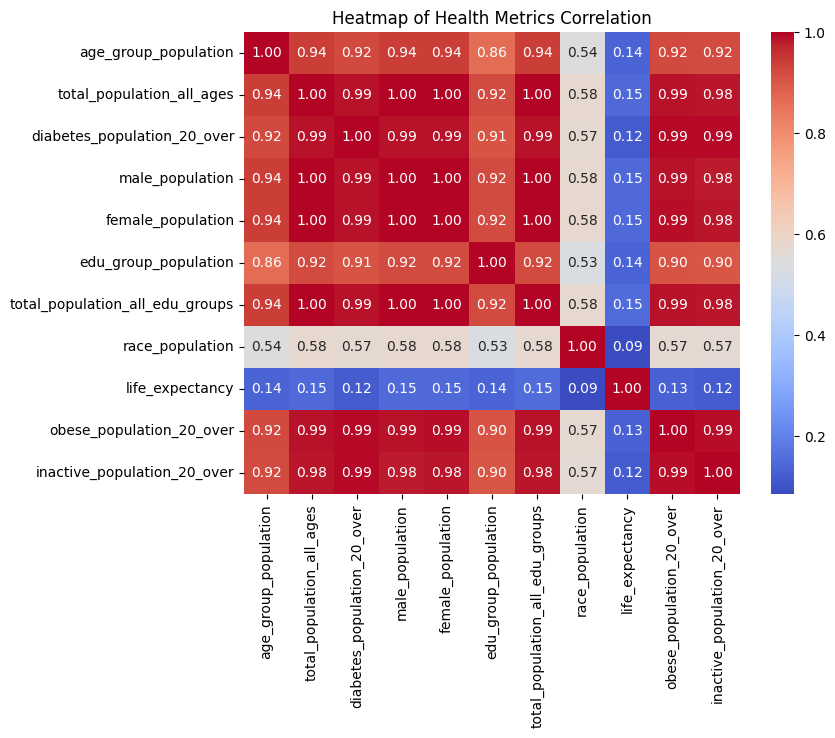

In [48]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Heatmap of Health Metrics Correlation')
plt.show()

**Interpretation:**

The correlation matrix of different health-related metrics is displayed visually in the heatmap. The correlation coefficients displayed in the cells represent the direction and strength of the linear link between two variables. Strong positive or negative correlations are shown by values close to 1 or -1, respectively, whilst weak or no linear relationships are indicated by values close to 0.

Most population variables, including age_group_population, total_population_all_ages, diabetes_population_20_over, male_population, and female_population, have strong positive associations, according to the heatmap. This shows that these variables, which most likely reflect various population segments, move in tandem with one another. Since they are all population measurements, it makes sense that if one increases, the others also tend to increase.

It's interesting to note that life_expectancy only exhibits minor correlations with other metrics, suggesting that either the interactions are nonlinear or that life_expectancy is influenced by factors not included in the other variables. Furthermore, there is a moderate degree of correlation, though not as high as the others, between race_population and other population variables.

Obese_population_20_over and inactive_population_20_over have substantial positive relationships with other population variables, which may indicate that as the population grows, so do the proportions of obese and inactive people. Further context-specific study would be necessary to determine the precise consequences for public health, especially with regard to how these population figures connect to the proportions of the overall population.

**Problem applicability:**

Our project's analysis centered on investigating the interrelationship between physical inactivity, obesity prevalence, and diabetes incidence rates across various demographics and geographic regions within the United States. We systematically integrated disparate public health datasets on lifestyle factors and health outcomes with demographic data sources to construct an enriched unified dataset.

Leveraging data visualization and statistical modeling techniques, our analysis uncovered insightful patterns, correlations and trends revealing how obesity rates and sedentary lifestyles influence diabetes prevalence at the state and sub-population level. These findings have meaningful real-world applications:

Public Health Departments can design targeted intervention programs using our granular county and demographic-specific insights. For example, campaigns promoting exercise and nutrition in youth can be strategically launched in areas where diabetes incidence among younger generations is highest, while taking into cultural factors. Resources can be allocated more efficiently to maximize public health impact.  

Policy makers can formulate strategic policies and regulations aimed at curbing obesity and incentivizing fitness using analysis revealing links between these factors and diabetes trends in high-risk communities. State and local legislature can mandate school fitness programs, nutrition standards, sugar taxes, and built environment enhancements based directly on data-driven risk profiles.

Health organizations now have statistical foundations for community outreach emphasizing exercise and nutrition as diabetes deterrents, backed by trends in the dataset. Outreach can be personalized to resonate across ethnicities and demographics with tailored messaging based on their associated risk indicators.  

Underserved locations are revealed where healthcare access gaps may exist despite high diabetes prevalence among groups in those areas. Health systems can now pinpoint where to expand facilities, mobile clinics, and telehealth. Planning becomes driven by real population health management needs rather than speculation.

Ongoing analysis can assess the longitudinal impact of newly implemented health policies by revisiting updated versions of the integrated dataset to compare diabetes incidence metrics before and after interventions launch. This enables continuous public health improvement.

In essence, our project’s data-driven approach transcended clinical statistics to deliver an actionable decision framework to inform initiatives that meaningfully improve population health outcomes among those most disproportionally impacted by diabetes linked to controllable lifestyle risk factors.